In [1]:
# displays static in notebook
%matplotlib inline  
# displays interactive outside notebook
#%matplotlib   
# displays interactive in notebook
#%matplotlib notebook  


import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy.coordinates as coord
import astropy.units as u

#from astropy import units as u
from astropy.coordinates import SkyCoord

folder = ''

mpl.rcParams['font.family']='serif'
mpl.rcParams['font.size']=14

In [3]:
# constants

G = 6.67408E-11     #gravitational constant, m3 kg-1 s-2
c = 2.99792458E8    #speed of light, m/s
pc = 3.086e+16      #parsec, m
ly = 9.461e+15      #light-year, m
arcsec_per_radian = 206264.94196924 
Msun = 1.989E30     #mass of sun, kg

source distance, light-years:  1000000000.0
source offset, light-years:  15000.0
lens distance, light-years:  500000000.0
lens mass, solar masses:  1000000000000.0
source offset angle, in arcseconds 3.093974129306552
theta1, theta2, check beta 6.9285436430948035 -3.8345695137882525 3.093974129306551 3.093974129306552
r1, r2 16795.252696732936 -9295.252692049451
phi (rad, degrees) 3.71810107499304e-05 0.002130314994001556
4.859050534585757e-05 0.0027840308807255028
original ray offset 18590.505369113598 -33590.5053267369


<Figure size 432x288 with 0 Axes>

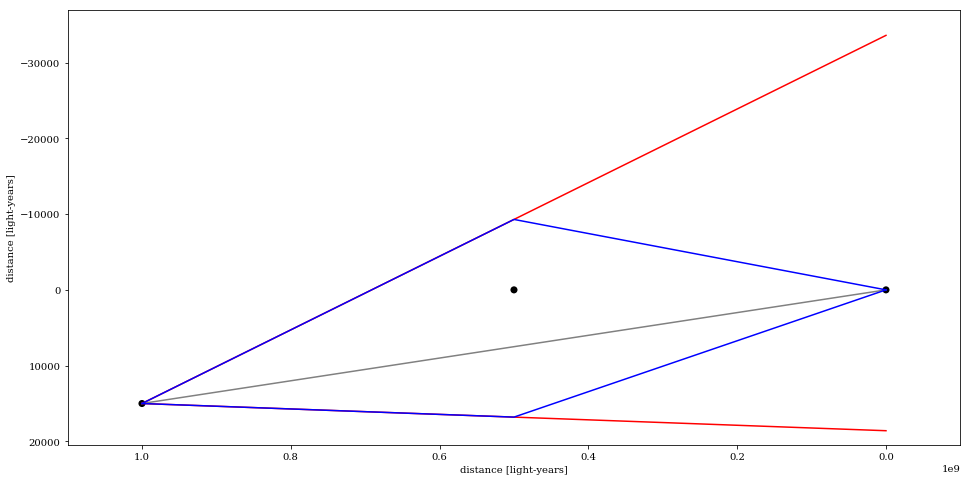

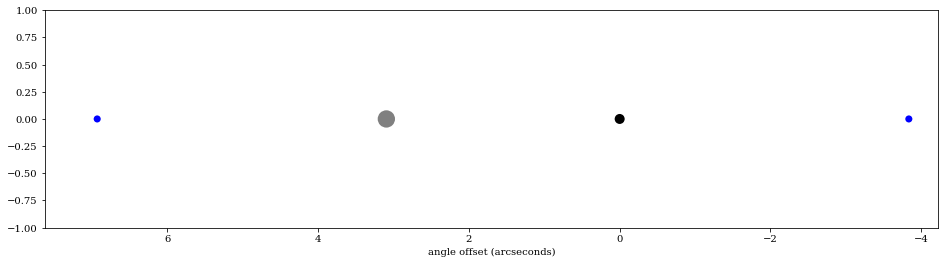

In [32]:
# EXAMPLE 1

# model parameters
# source is far to one side of the source

# these will be the sliders in the model
M = 1E12     # mass of lens, solar units
dL = 5E8     # distance to lens, light-years
dS = 1E9     # distance to source, light-years
#beta = 30.0  # angle between lens and source, arcseconds.  i.e., how far to to the side would we have to point to see the distant source
X1 = 1.5E4   # distance offset of source, light-years, from Earth-lens line


print('source distance, light-years: ', dS)
print('source offset, light-years: ', X1)
print('lens distance, light-years: ', dL)
print('lens mass, solar masses: ', M)

beta = np.arctan2(X1,dS) * arcsec_per_radian
print('source offset angle, in arcseconds', beta)



# calculations
# from Carroll & Ostlie, An Introduction to Modern Astrophysics, 2nd edition
# use quadratic equation to solve equation 28.21
rad_term = ((beta / arcsec_per_radian)**2 + 4 * (4 * G * M * Msun / c**2) * (dS - dL)/(dS * dL * ly))**(0.5)
theta1 = ((beta / arcsec_per_radian) + rad_term)/2
theta2 = ((beta / arcsec_per_radian) - rad_term)/2
print('theta1, theta2, check beta', theta1 * arcsec_per_radian, theta2 * arcsec_per_radian, (theta1+theta2)*arcsec_per_radian, beta)


# use incoming rays to calculate how far off to the side each ray passed by the lens
r1 = dL * np.tan(theta1)
r2 = dL * np.tan(theta2)
print('r1, r2', r1, r2)

# calculate deflection of original ray 
phi = ((4 * G * M * Msun) / (r1 * ly * c**2))
print('phi (rad, degrees)', phi, phi * 180 / np.pi)

# deprecated - now X1 is a primary input, rather than beta
#X1 = dS * np.tan(beta/arcsec_per_radian)
#print('source offset distance', X1)

# calculate how far off to the side the observed light would have landed
Y1 = X1 - dS*np.tan(theta1 - phi)
#Y2 = X1 - (X1 - r2) * dL / (dS-dL)
#print(X1, (X1 - r2), dL / (dS-dL))
alpha = np.arctan2(X1-r2,dS-dL)
print(alpha,alpha*180/np.pi)
Y2 = X1 - dS * np.sin(alpha)
print('original ray offset', Y1,Y2)


# top down view of geometry

plt.clf()
plt.figure(figsize=(16,8))
# reverse X axis
plt.xlim(1.1*dS, -0.1*dS)
#plt.ylim(1.1 * np.min([r2,Y2,0]), 1.1 * np.max([r1,X1,Y1]))
plt.ylim(1.1 * np.max([r1,0,Y1]), 1.1 * np.min([r2,Y2,X1]))
plt.xlabel('distance [light-years]')
plt.ylabel('distance [light-years]')

# us, on the right hand side
plt.scatter([0], [0], c = 'black', s = 50, edgecolors = 'none')
# the lensing cluster
plt.scatter([dL], [0], c = 'black', s = 50, edgecolors = 'none')
# the distance source
plt.scatter([dS], [X1], c = 'black', s = 50, edgecolors = 'none')
# the straight line path from the distance source to us - the direction we would look to see it if there was nothing in the way
plt.plot([dS,0],[X1,0], c = 'gray')
# the path the light we end up seeing would have taken without the lensing cluster
# the light we end up seeing would have zipped past us!
plt.plot([dS,0],[X1,Y1], c = 'red')
plt.plot([dS,0],[X1,Y2], c = 'red')
# the path the light actually took to us, thanks to the lensing cluster
plt.plot([dS,dL,0],[X1,r1,0], c = 'blue', linestyle='-')
plt.plot([dS,dL,0],[X1,r2,0], c = 'blue', linestyle='-')



# our view of the sky
plt.figure(figsize=(16,4))
plt.xlim(1.1 * theta1 * arcsec_per_radian, 1.1 * theta2 * arcsec_per_radian)
plt.ylim(-1,1)
plt.xlabel('angle offset (arcseconds)')
plt.ylabel('')

# here's where the distant source would have appeared on the sky, if there was nothing in the way
plt.scatter([beta], [0], c = 'gray', s = 300, edgecolors = 'none')
# here's where we see the lensing cluster
plt.scatter([0], [0], c = 'black', s = 100, edgecolors = 'none')
# we end up seeing the distant source at these two spots on the sky
plt.scatter([theta1 * arcsec_per_radian], [0], c = 'blue', s = 50, edgecolors = 'none')
plt.scatter([theta2 * arcsec_per_radian], [0], c = 'blue', s = 50, edgecolors = 'none')



source distance, light-years:  1000000000.0
source offset, light-years:  -15000.0
lens distance, light-years:  100000000.0
lens mass, solar masses:  100000000000.0
source offset angle, in arcseconds -3.093974129306552
theta1, theta2, check beta 3.5817898835177986 -6.675764012824351 -3.093974129306553 -3.093974129306552
r1, r2 1736.4995959478015 -3236.499596790829
phi (rad, degrees) 3.596110661483827e-05 0.00206041963565022
-1.3070556002821424e-05 -0.0007488876948510509
original ray offset 3596.1106592492943 -1929.4439975507375


<Figure size 432x288 with 0 Axes>

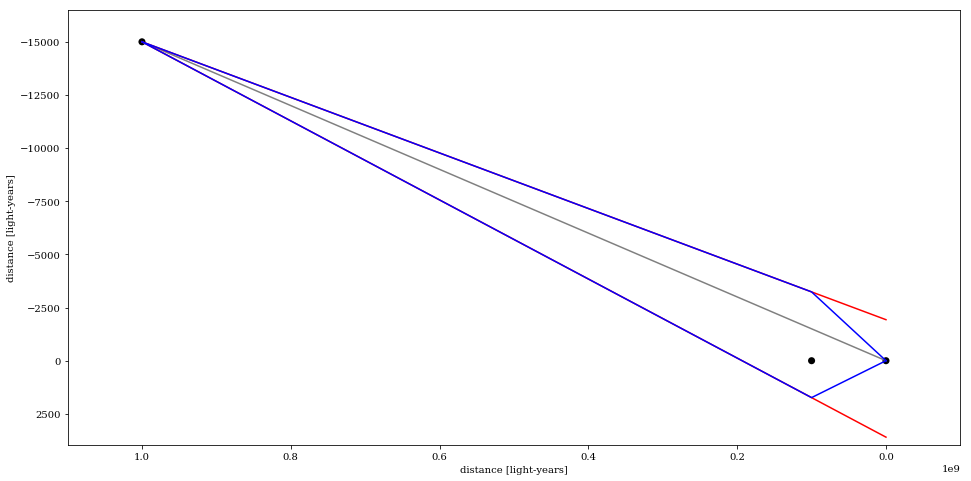

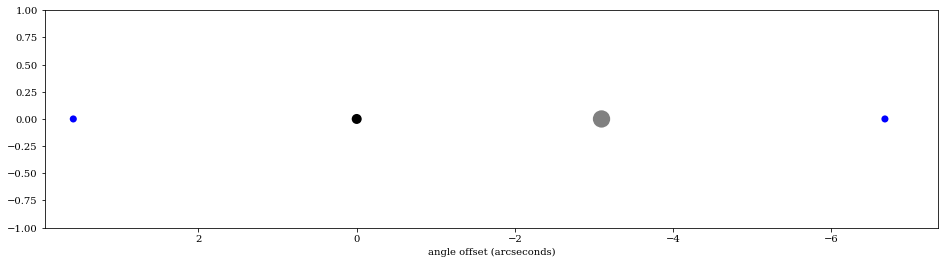

In [33]:
# EXAMPLE 2

# model parameters
# source is far to one side of the source

# these will be the sliders in the model
M = 1E11     # mass of lens, solar units
dL = 1E8     # distance to lens, light-years
dS = 1E9     # distance to source, light-years
#beta = 30.0  # angle between lens and source, arcseconds.  i.e., how far to to the side would we have to point to see the distant source
X1 = -1.5E4   # distance offset of source, light-years, from Earth-lens line




print('source distance, light-years: ', dS)
print('source offset, light-years: ', X1)
print('lens distance, light-years: ', dL)
print('lens mass, solar masses: ', M)

beta = np.arctan2(X1,dS) * arcsec_per_radian
print('source offset angle, in arcseconds', beta)



# calculations
# from Carroll & Ostlie, An Introduction to Modern Astrophysics, 2nd edition
# use quadratic equation to solve equation 28.21
rad_term = ((beta / arcsec_per_radian)**2 + 4 * (4 * G * M * Msun / c**2) * (dS - dL)/(dS * dL * ly))**(0.5)
theta1 = ((beta / arcsec_per_radian) + rad_term)/2
theta2 = ((beta / arcsec_per_radian) - rad_term)/2
print('theta1, theta2, check beta', theta1 * arcsec_per_radian, theta2 * arcsec_per_radian, (theta1+theta2)*arcsec_per_radian, beta)


# use incoming rays to calculate how far off to the side each ray passed by the lens
r1 = dL * np.tan(theta1)
r2 = dL * np.tan(theta2)
print('r1, r2', r1, r2)

# calculate deflection of original ray 
phi = ((4 * G * M * Msun) / (r1 * ly * c**2))
print('phi (rad, degrees)', phi, phi * 180 / np.pi)

# deprecated - now X1 is a primary input, rather than beta
#X1 = dS * np.tan(beta/arcsec_per_radian)
#print('source offset distance', X1)

# calculate how far off to the side the observed light would have landed
Y1 = X1 - dS*np.tan(theta1 - phi)
#Y2 = X1 - (X1 - r2) * dL / (dS-dL)
#print(X1, (X1 - r2), dL / (dS-dL))
alpha = np.arctan2(X1-r2,dS-dL)
print(alpha,alpha*180/np.pi)
Y2 = X1 - dS * np.sin(alpha)
print('original ray offset', Y1,Y2)


# top down view of geometry

plt.clf()
plt.figure(figsize=(16,8))
# reverse X axis
plt.xlim(1.1*dS, -0.1*dS)
#plt.ylim(1.1 * np.min([r2,Y2,0]), 1.1 * np.max([r1,X1,Y1]))
plt.ylim(1.1 * np.max([r1,0,Y1]), 1.1 * np.min([r2,Y2,X1]))
plt.xlabel('distance [light-years]')
plt.ylabel('distance [light-years]')

# us, on the right hand side
plt.scatter([0], [0], c = 'black', s = 50, edgecolors = 'none')
# the lensing cluster
plt.scatter([dL], [0], c = 'black', s = 50, edgecolors = 'none')
# the distance source
plt.scatter([dS], [X1], c = 'black', s = 50, edgecolors = 'none')
# the straight line path from the distance source to us - the direction we would look to see it if there was nothing in the way
plt.plot([dS,0],[X1,0], c = 'gray')
# the path the light we end up seeing would have taken without the lensing cluster
# the light we end up seeing would have zipped past us!
plt.plot([dS,0],[X1,Y1], c = 'red')
plt.plot([dS,0],[X1,Y2], c = 'red')
# the path the light actually took to us, thanks to the lensing cluster
plt.plot([dS,dL,0],[X1,r1,0], c = 'blue', linestyle='-')
plt.plot([dS,dL,0],[X1,r2,0], c = 'blue', linestyle='-')



# our view of the sky
plt.figure(figsize=(16,4))
plt.xlim(1.1 * theta1 * arcsec_per_radian, 1.1 * theta2 * arcsec_per_radian)
plt.ylim(-1,1)
plt.xlabel('angle offset (arcseconds)')
plt.ylabel('')

# here's where the distant source would have appeared on the sky, if there was nothing in the way
plt.scatter([beta], [0], c = 'gray', s = 300, edgecolors = 'none')
# here's where we see the lensing cluster
plt.scatter([0], [0], c = 'black', s = 100, edgecolors = 'none')
# we end up seeing the distant source at these two spots on the sky
plt.scatter([theta1 * arcsec_per_radian], [0], c = 'blue', s = 50, edgecolors = 'none')
plt.scatter([theta2 * arcsec_per_radian], [0], c = 'blue', s = 50, edgecolors = 'none')


source distance, light-years:  1000000000.0
source offset, light-years:  1000.0
lens distance, light-years:  800000000.0
lens mass, solar masses:  100000000000.0
source offset angle, in arcseconds 0.20626494196917125
theta1, theta2, check beta 0.924616410140096 -0.7183514681709248 0.20626494196917128 0.20626494196917125
r1, r2 3586.1311236658958 -2786.131123653406
phi (rad, degrees) 1.741331952264675e-05 0.0009977097159604201
1.8930655616005638e-05 0.0010846466702127526
original ray offset 13930.655618815079 -17930.655614874944


<Figure size 432x288 with 0 Axes>

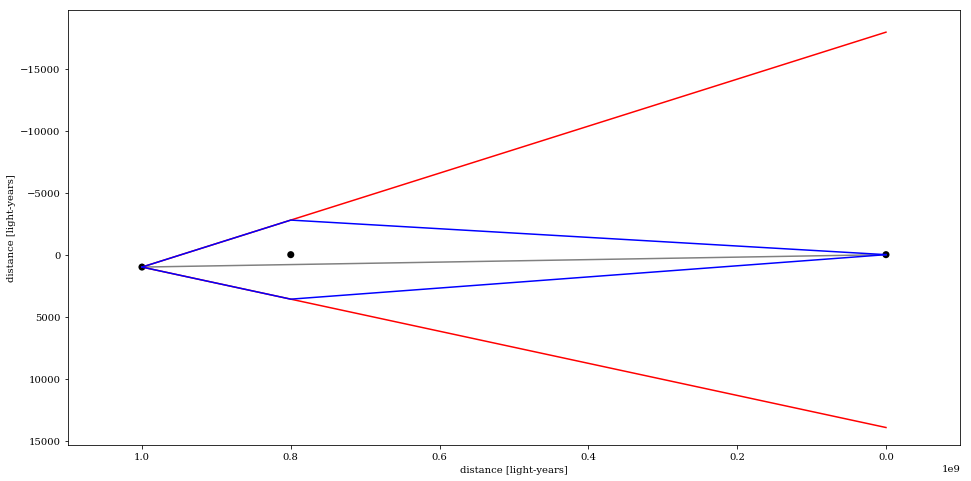

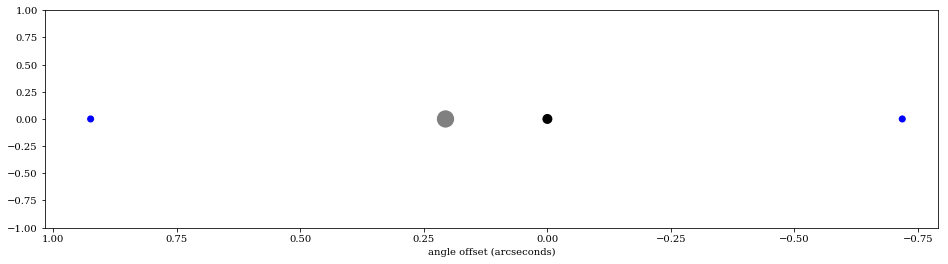

In [34]:
# EXAMPLE 3

# model parameters
# source is far to one side of the source

# these will be the sliders in the model
M = 1E11     # mass of lens, solar units
dL = 8E8     # distance to lens, light-years
dS = 1E9     # distance to source, light-years
#beta = 30.0  # angle between lens and source, arcseconds.  i.e., how far to to the side would we have to point to see the distant source
X1 = 1.0E3   # distance offset of source, light-years, from Earth-lens line




print('source distance, light-years: ', dS)
print('source offset, light-years: ', X1)
print('lens distance, light-years: ', dL)
print('lens mass, solar masses: ', M)

beta = np.arctan2(X1,dS) * arcsec_per_radian
print('source offset angle, in arcseconds', beta)



# calculations
# from Carroll & Ostlie, An Introduction to Modern Astrophysics, 2nd edition
# use quadratic equation to solve equation 28.21
rad_term = ((beta / arcsec_per_radian)**2 + 4 * (4 * G * M * Msun / c**2) * (dS - dL)/(dS * dL * ly))**(0.5)
theta1 = ((beta / arcsec_per_radian) + rad_term)/2
theta2 = ((beta / arcsec_per_radian) - rad_term)/2
print('theta1, theta2, check beta', theta1 * arcsec_per_radian, theta2 * arcsec_per_radian, (theta1+theta2)*arcsec_per_radian, beta)


# use incoming rays to calculate how far off to the side each ray passed by the lens
r1 = dL * np.tan(theta1)
r2 = dL * np.tan(theta2)
print('r1, r2', r1, r2)

# calculate deflection of original ray 
phi = ((4 * G * M * Msun) / (r1 * ly * c**2))
print('phi (rad, degrees)', phi, phi * 180 / np.pi)

# deprecated - now X1 is a primary input, rather than beta
#X1 = dS * np.tan(beta/arcsec_per_radian)
#print('source offset distance', X1)

# calculate how far off to the side the observed light would have landed
Y1 = X1 - dS*np.tan(theta1 - phi)
#Y2 = X1 - (X1 - r2) * dL / (dS-dL)
#print(X1, (X1 - r2), dL / (dS-dL))
alpha = np.arctan2(X1-r2,dS-dL)
print(alpha,alpha*180/np.pi)
Y2 = X1 - dS * np.sin(alpha)
print('original ray offset', Y1,Y2)


# top down view of geometry

plt.clf()
plt.figure(figsize=(16,8))
# reverse X axis
plt.xlim(1.1*dS, -0.1*dS)
#plt.ylim(1.1 * np.min([r2,Y2,0]), 1.1 * np.max([r1,X1,Y1]))
plt.ylim(1.1 * np.max([r1,0,Y1]), 1.1 * np.min([r2,Y2,X1]))
plt.xlabel('distance [light-years]')
plt.ylabel('distance [light-years]')

# us, on the right hand side
plt.scatter([0], [0], c = 'black', s = 50, edgecolors = 'none')
# the lensing cluster
plt.scatter([dL], [0], c = 'black', s = 50, edgecolors = 'none')
# the distance source
plt.scatter([dS], [X1], c = 'black', s = 50, edgecolors = 'none')
# the straight line path from the distance source to us - the direction we would look to see it if there was nothing in the way
plt.plot([dS,0],[X1,0], c = 'gray')
# the path the light we end up seeing would have taken without the lensing cluster
# the light we end up seeing would have zipped past us!
plt.plot([dS,0],[X1,Y1], c = 'red')
plt.plot([dS,0],[X1,Y2], c = 'red')
# the path the light actually took to us, thanks to the lensing cluster
plt.plot([dS,dL,0],[X1,r1,0], c = 'blue', linestyle='-')
plt.plot([dS,dL,0],[X1,r2,0], c = 'blue', linestyle='-')



# our view of the sky
plt.figure(figsize=(16,4))
plt.xlim(1.1 * theta1 * arcsec_per_radian, 1.1 * theta2 * arcsec_per_radian)
plt.ylim(-1,1)
plt.xlabel('angle offset (arcseconds)')
plt.ylabel('')

# here's where the distant source would have appeared on the sky, if there was nothing in the way
plt.scatter([beta], [0], c = 'gray', s = 300, edgecolors = 'none')
# here's where we see the lensing cluster
plt.scatter([0], [0], c = 'black', s = 100, edgecolors = 'none')
# we end up seeing the distant source at these two spots on the sky
plt.scatter([theta1 * arcsec_per_radian], [0], c = 'blue', s = 50, edgecolors = 'none')
plt.scatter([theta2 * arcsec_per_radian], [0], c = 'blue', s = 50, edgecolors = 'none')




In [8]:
#remainder are diagnostic plots.  Maybe we'll come back to adding these in, but not MVP

<Figure size 432x288 with 0 Axes>

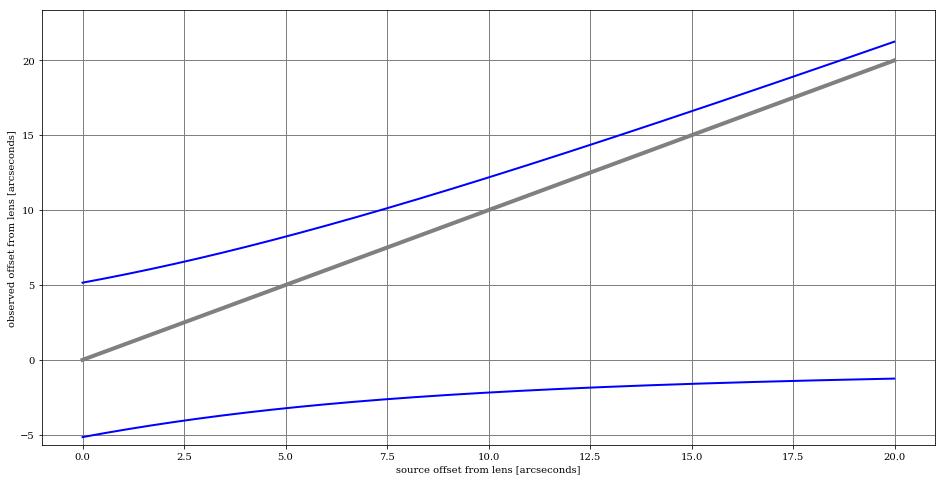

In [35]:
# model parameters

M = 1E12     # mass of lens, solar units
dL = 5E8     # distance to lens, light-years
dS = 1E9     # distance to source, light-years
beta = 20.0  # angle between lens and source, arcseconds
betas = np.arange(0,20,0.01)
theta1s = np.zeros(len(betas))
theta2s = np.zeros(len(betas))
j=0

for beta in betas:
    # calculations
    radical_term = ((beta / arcsec_per_radian)**2 + 4 * (4 * G * M * Msun / c**2) * (dS - dL)/(dS * dL * ly))**(0.5)
    #print(rad_term)
    theta1 = ((beta / arcsec_per_radian) + radical_term)/2
    theta2 = ((beta / arcsec_per_radian) - radical_term)/2
    #print('theta1, theta2, check beta', theta1 * arcsec_per_rad, theta2 * arcsec_per_rad, (theta1+theta2)*arcsec_per_rad, beta)
    theta1s[j] = theta1 * arcsec_per_radian
    theta2s[j] = theta2 * arcsec_per_radian
    j+= 1
    
    r1 = dL * np.tan(theta1)
    r2 = dL * np.tan(theta2)
    #print('r1, r2', r1, r2)

    phi = ((4 * G * M * Msun) / (r1 * ly * c**2))
    #print('phi (rad, degrees)', phi, phi * 180 / np.pi)

    X1 = dS * np.tan(beta/arcsec_per_radian)
    #print('source offset distance', X1)

    # calculate how far off to the side the observed light would have landed
    Y1 = X1 - dS*np.tan(theta1 - phi)
    #Y2 = X1 - (X1 - r2) * dL / (dS-dL)
    #print(X1, (X1 - r2), dL / (dS-dL))
    alpha = np.arctan2(X1-r2,dS-dL)
    #print(alpha,alpha*180/np.pi)
    Y2 = X1 - dS * np.sin(alpha)
    #print('original ray offset', Y1,Y2)


plt.clf()
plt.figure(figsize=(16,8))
plt.xlim(np.min(betas)-1, np.max(betas)+1)
plt.ylim(1.1 * np.min(theta2s), 1.1 * np.max(theta1s))
plt.xlabel('source offset from lens [arcseconds]')
plt.ylabel('observed offset from lens [arcseconds]')

#plt.scatter([0], [0], c = 'black', s = 50, edgecolors = 'none')
plt.plot(betas,theta1s, c = 'blue', linewidth = 2)
plt.plot(betas,theta2s, c = 'blue', linewidth = 2)
plt.plot(betas,betas, c = 'gray', linewidth = 4)

#ax.grid(True)
plt.grid(linestyle='-', linewidth=1, color='gray')



<Figure size 432x288 with 0 Axes>

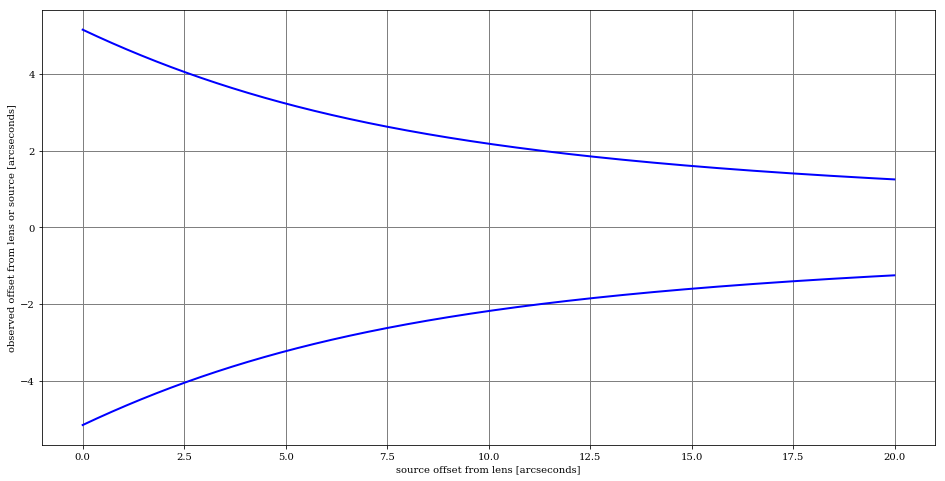

In [36]:
theta1_offset_source = theta1s - betas

plt.clf()
plt.figure(figsize=(16,8))
plt.xlim(np.min(betas)-1, np.max(betas)+1)
plt.ylim(1.1 * np.min(theta2s), 1.1 * np.max(theta1_offset_source))
plt.xlabel('source offset from lens [arcseconds]')
plt.ylabel('observed offset from lens or source [arcseconds]')

#plt.scatter([0], [0], c = 'black', s = 50, edgecolors = 'none')
plt.plot(betas,theta1_offset_source, c = 'blue', linewidth = 2)
plt.plot(betas,theta2s, c = 'blue', linewidth = 2)
#plt.plot(betas,betas, c = 'gray', linewidth = 4)

#ax.grid(True)
plt.grid(linestyle='-', linewidth=1, color='gray')
